In [2]:
import pandas as pd

In [ ]:
cctv_df = pd.read_csv('./data/cctv/무인교통단속카메라현황.csv', encoding='cp949')

In [4]:
print(cctv_df.shape)
cctv_df.info()

(11656, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   무인교통단속카메라관리번호  11656 non-null  object 
 1   시도명            11656 non-null  object 
 2   시군명            11656 non-null  object 
 3   도로종류           11656 non-null  object 
 4   도로노선번호         2780 non-null   object 
 5   도로노선명          11656 non-null  object 
 6   도로노선방향         11656 non-null  int64  
 7   소재지도로명주소       5202 non-null   object 
 8   소재지지번주소        11638 non-null  object 
 9   위도             11656 non-null  float64
 10  경도             11656 non-null  float64
 11  설치장소           11656 non-null  object 
 12  단속구분           11656 non-null  object 
 13  제한속도           11656 non-null  int64  
 14  보호구역구분         8079 non-null   float64
 15  설치연도           11042 non-null  float64
 16  관리기관명          11656 non-null  object 
 17  관리기관전화번호       11656 non-null  object 

In [5]:
cctv_df.head(2)

,무인교통단속카메라관리번호,시도명,시군명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도,관리기관명,관리기관전화번호,데이터기준일자
0,G2403,경기도,가평군,일반국도,75,호반로,3,NaN,경기도 가평군 가평읍 달전리 452-10,37.81414,127.514933,농협 앞(남이섬-&amp;gt;가평경찰서),1,30,99.0,2018.0,경기도북부경찰청,031-961-2651,2025-03-28
1,F9916,경기도,가평군,일반국도,46,경춘로,1,NaN,경기도 가평군 청평면 대성리 758,37.69729,127.384018,원대성리 삼거리앞(청평터미널→대성리역),2,70,99.0,2017.0,경기도북부경찰청,031-961-2651,2025-03-28


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [17]:
sido_counts = cctv_df['시군명'].value_counts().reset_index()
sido_counts.columns = ['시군명', '카메라수']

In [ ]:
sido_counts.shape   # 시도 종류 34개

(34, 2)

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_4816\3325058646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sido_counts, x='시군명', y='카메라수', palette='viridis')


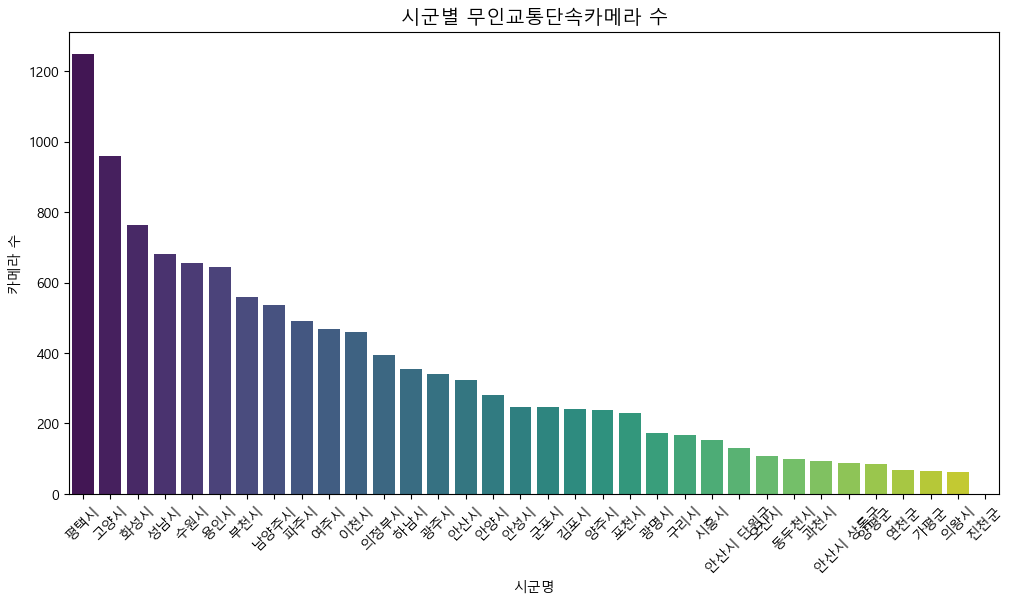

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=sido_counts, x='시군명', y='카메라수', palette='viridis')
plt.xticks(rotation=45)
plt.title('시군별 무인교통단속카메라 수', fontsize=14)
plt.xlabel('시군명')
plt.ylabel('카메라 수')
plt.show()

In [22]:
# 단속 구분
# 01:속도, 02:신호, 03:통행위반, 04:불법주정차, 99:기타

code_map = {
    "1": "속도위반",
    "2": "신호위반",
    "3": "통행위반",
    "4": "불법주정차",
    "99": "기타"
}

cctv_df['단속구분라벨'] = cctv_df['단속구분'].astype(str).map(code_map)
cctv_df.head(2)

,무인교통단속카메라관리번호,시도명,시군명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,보호구역구분,설치연도,관리기관명,관리기관전화번호,데이터기준일자,단속구분라벨
0,G2403,경기도,가평군,일반국도,75,호반로,3,NaN,경기도 가평군 가평읍 달전리 452-10,37.81414,127.514933,농협 앞(남이섬-&amp;gt;가평경찰서),1,30,99.0,2018.0,경기도북부경찰청,031-961-2651,2025-03-28,속도위반
1,F9916,경기도,가평군,일반국도,46,경춘로,1,NaN,경기도 가평군 청평면 대성리 758,37.69729,127.384018,원대성리 삼거리앞(청평터미널→대성리역),2,70,99.0,2017.0,경기도북부경찰청,031-961-2651,2025-03-28,신호위반


In [ ]:
# 단속구분별 비율
cctv_df['단속구분라벨'].value_counts(normalize=True) * 100

단속구분라벨
신호위반     63.387540
속도위반     20.499313
불법주정차    14.349519
기타        1.649107
통행위반      0.114521
Name: proportion, dtype: float64

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_4816\968809010.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts['단속구분라벨'], y=counts['count'], palette='Set2')


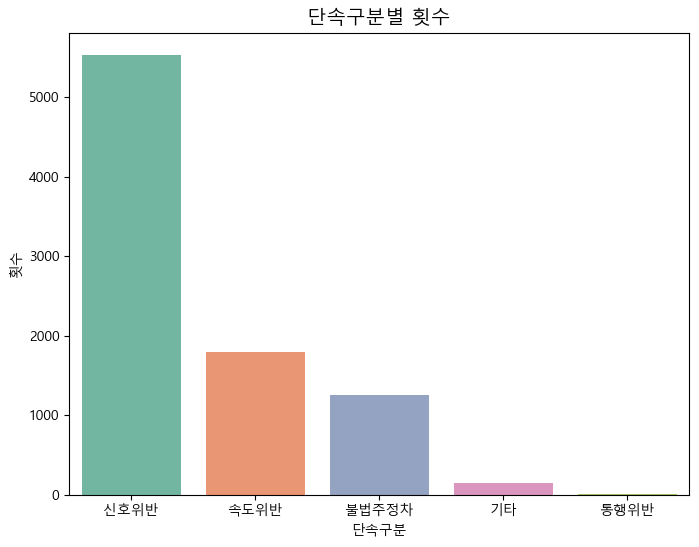

In [ ]:
# 단속구분별 횟수
counts = cctv_df['단속구분라벨'].value_counts().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x=counts['단속구분라벨'], y=counts['count'], palette='Set2')
plt.title('단속구분별 횟수', fontsize=14)
plt.ylabel('횟수')
plt.xlabel('단속구분')
plt.show()


In [32]:
# 시군별 연도별 카메라수 집계
gyeonggi_df = cctv_df.copy()
gyeonggi_df = gyeonggi_df.dropna(subset=['설치연도'])
gyeonggi_df['설치연도'] = gyeonggi_df['설치연도'].astype(int)

In [34]:
yearly_counts = (
    gyeonggi_df
    .groupby(['시군명', '설치연도'])
    .size()
    .reset_index(name='카메라수')
)

yearly_counts

,시군명,설치연도,카메라수
0,가평군,2016,1
1,가평군,2017,2
2,가평군,2018,1
3,가평군,2020,13
4,가평군,2021,21
...,...,...,...
373,화성시,2020,76
374,화성시,2021,66
375,화성시,2022,120
376,화성시,2023,159


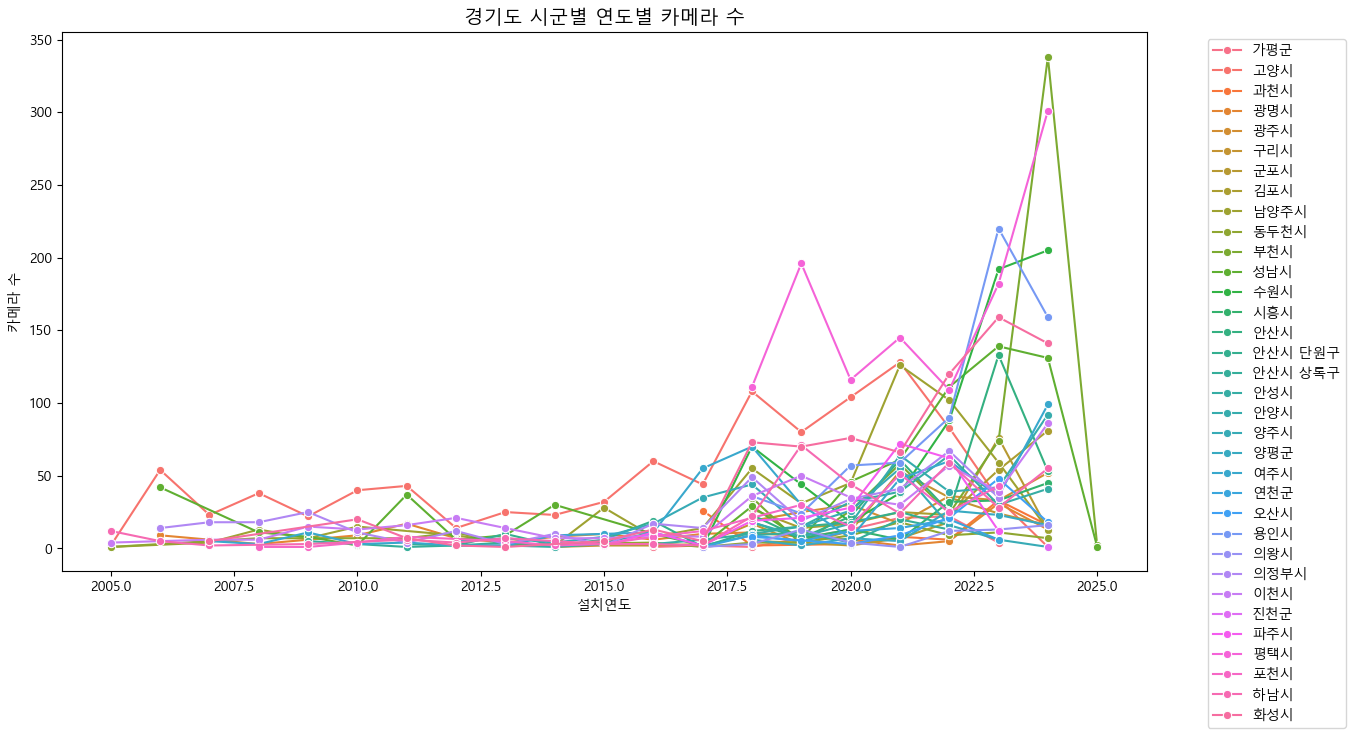

In [35]:
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_counts, x='설치연도', y='카메라수', hue='시군명', marker='o')
plt.title('경기도 시군별 연도별 카메라 수', fontsize=14)
plt.xlabel('설치연도')
plt.ylabel('카메라 수')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()